In [2]:
import pandas as pd
import numpy as np
import os
import sys
import cv2
import PIL
import tensorflow as tf
import matplotlib.pylab as plt

import tensorflow_hub as hub
import tensorflow_datasets as tfds

from tensorflow.keras import layers

In [3]:
base_path='/content/drive/My Drive/Intermediate_Assignment_Dataset'

(120, 128)


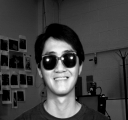

In [4]:
img=cv2.imread('/content/drive/My Drive/Intermediate_Assignment_Dataset/YesSunglasses104.pgm',-1) 
print(img.shape)
from google.colab.patches import cv2_imshow
cv2_imshow(img)

In [5]:
# all the image sizes are (120,128)

In [6]:
X=[]
Y=[]
for filename in os.listdir(base_path):
    if filename.endswith(".pgm"): 
         file_path=os.path.join(base_path, filename)
         if filename[0:2]=='No':
           Y.append(0.0)
         if filename[0:3]=='Yes':
           Y.append(1.0)
         img=cv2.imread(file_path,-1)
         X.append(img) 


     

In [7]:
np.save('sunglass.npy', X, allow_pickle=True, fix_imports=True)

In [26]:
X=np.load('sunglass.npy')

In [27]:
X=np.asarray(X)/255.00
Y=np.asarray(Y)
print(X.shape,Y.shape)

(624, 120, 128) (624, 1)


In [31]:
Y=np.reshape(Y,(624,1)) 

In [32]:
X = np.expand_dims(X, axis = -1)

In [73]:
import numpy as np
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X, Y, test_size=0.30, random_state=1)
X_test,X_val,Y_test,Y_val=train_test_split(X_test, Y_test, test_size=0.66, random_state=1)

In [74]:
from keras import layers
from keras import regularizers
from keras.utils.np_utils import to_categorical
from keras.layers import Input, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D
from keras.layers import AveragePooling2D, MaxPooling2D, Dropout, GlobalMaxPooling2D, GlobalAveragePooling2D
from keras.models import Model
from keras.preprocessing import image
from keras.utils import layer_utils
from IPython.display import SVG
import keras

In [75]:
from keras.models import Sequential
model=Sequential()

 

model.add(Conv2D(32, (5,5), strides=(1, 1), padding='valid', activation=None, use_bias=True, kernel_initializer='glorot_uniform', bias_initializer='zeros', kernel_regularizer=None, bias_regularizer=None, activity_regularizer=None, kernel_constraint=None, bias_constraint=None,input_shape=(120,128,1)))
model.add(BatchNormalization(axis=-1))
model.add(Activation('relu'))
model.add(MaxPooling2D((2,2)))
#model.add(Dropout(0.1))

model.add(Conv2D(64, (5,5), strides=(1, 1), padding='valid', activation=None, use_bias=True, kernel_initializer='glorot_uniform', bias_initializer='zeros', kernel_regularizer=None, bias_regularizer=None, activity_regularizer=None, kernel_constraint=None, bias_constraint=None))
model.add(BatchNormalization(axis=-1))
model.add(Activation('relu'))
model.add(MaxPooling2D((2,2)))
#model.add(Dropout(0.1))

model.add(Conv2D(128, (5,5), strides=(1, 1), padding='valid', activation=None, use_bias=True, kernel_initializer='glorot_uniform', bias_initializer='zeros', kernel_regularizer=None, bias_regularizer=None, activity_regularizer=None, kernel_constraint=None, bias_constraint=None))
model.add(BatchNormalization(axis=-1))
model.add(Activation('relu'))
model.add(MaxPooling2D((2,2)))
#model.add(Dropout(0.1))

model.add(Conv2D(256, (5,5), strides=(1, 1), padding='valid', activation=None, use_bias=True, kernel_initializer='glorot_uniform', bias_initializer='zeros', kernel_regularizer=None, bias_regularizer=None, activity_regularizer=None, kernel_constraint=None, bias_constraint=None))
model.add(BatchNormalization(axis=-1))
model.add(Activation('relu'))
#model.add(Dropout(0.1)) 
 

 

model.add(Flatten())
model.add(Dense(512, activation='relu', use_bias=True, kernel_initializer='glorot_uniform', bias_initializer='zeros', kernel_regularizer=None, bias_regularizer=None, activity_regularizer=None, kernel_constraint=None, bias_constraint=None))
 
model.add(Dense(1, activation='sigmoid', use_bias=True, kernel_initializer='glorot_uniform', bias_initializer='zeros', kernel_regularizer=None, bias_regularizer=None, activity_regularizer=None, kernel_constraint=None, bias_constraint=None))

In [76]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_37 (Conv2D)           (None, 116, 124, 32)      832       
_________________________________________________________________
batch_normalization_37 (Batc (None, 116, 124, 32)      128       
_________________________________________________________________
activation_37 (Activation)   (None, 116, 124, 32)      0         
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 58, 62, 32)        0         
_________________________________________________________________
conv2d_38 (Conv2D)           (None, 54, 58, 64)        51264     
_________________________________________________________________
batch_normalization_38 (Batc (None, 54, 58, 64)        256       
_________________________________________________________________
activation_38 (Activation)   (None, 54, 58, 64)      

In [77]:
optimizer = keras.optimizers.Adam(lr=0.05)

In [78]:
model.compile(optimizer, 'binary_crossentropy', metrics=['accuracy'])

In [79]:
model.fit(x = X_train, y = Y_train, epochs = 40, batch_size = 8, validation_data=(X_val,Y_val) )

Train on 436 samples, validate on 125 samples
Epoch 1/40
436/436 [==============================] - 4s 8ms/step - loss: 68.8922 - accuracy: 0.4954 - val_loss: 233.4865 - val_accuracy: 0.4960
Epoch 2/40
436/436 [==============================] - 3s 6ms/step - loss: 0.7617 - accuracy: 0.5619 - val_loss: 17.2344 - val_accuracy: 0.5120
Epoch 3/40
436/436 [==============================] - 3s 6ms/step - loss: 0.6584 - accuracy: 0.6216 - val_loss: 4.7493 - val_accuracy: 0.5200
Epoch 4/40
436/436 [==============================] - 3s 6ms/step - loss: 0.6420 - accuracy: 0.6353 - val_loss: 1.1961 - val_accuracy: 0.6320
Epoch 5/40
436/436 [==============================] - 3s 6ms/step - loss: 0.5807 - accuracy: 0.6972 - val_loss: 0.7393 - val_accuracy: 0.7360
Epoch 6/40
436/436 [==============================] - 3s 6ms/step - loss: 0.6016 - accuracy: 0.6812 - val_loss: 0.5711 - val_accuracy: 0.7120
Epoch 7/40
436/436 [==============================] - 3s 6ms/step - loss: 0.5159 - accuracy: 0.738

In [105]:
Y_pred=model.predict(X)

In [106]:
tp=0
fp=0
fn=0
for i in range(len(Y_pred)):
  if Y_pred[i]>=0.5 and Y[i]==1.0:
    tp=tp+1
  if Y_pred[i]>=0.5 and Y[i]==0.0:
    fp=fp+1 
  if Y_pred[i]<0.5 and Y[i]==1:
    fn=fn+1 
print(tp,fp,fn)

252 0 59


In [107]:
precision=tp/(tp+fp)
recall=tp/(tp+fn)
print(precision,recall)

1.0 0.8102893890675241


In [108]:
print('f1 score is: ')
print(2*(precision*recall/(precision+recall)))

f1 score is: 
0.8952042628774424
